In [46]:
import os
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import openai
import pandas as pd

from dotenv import load_dotenv

load_dotenv()

openai.api_key = os.getenv('OPENAI_API_KEY')
openai.organization = os.getenv('ORGANIZATION_ID')

embedding_words = pd.DataFrame([['Arabic', 'الذكاء الصناعي'],
 ['Bengali', 'কৃত্রিম বুদ্ধিমত্তা'],
 ['Chinese', '人工智能'],
 ['Dutch', 'Kunstmatige intelligentie'],
 ['French', 'Intelligence artificielle'],
 ['German', 'Künstliche Intelligenz'],
 ['Greek', 'Τεχνητή νοημοσύνη'],
 ['Hebrew', 'בינה מלאכותית'],
 ['Hindi', 'कृत्रिम बुद्धि'],
 ['Indonesian', 'Kecerdasan Buatan'],
 ['Italian', 'Intelligenza artificiale'],
 ['Japanese', '人工知能'],
 ['Korean', '인공 지능'],
 ['Persian', 'هوش مصنوعی'],
 ['Polish', 'Sztuczna inteligencja'],
 ['Portuguese', 'Inteligência artificial'],
 ['Russian', 'Искусственный интеллект'],
 ['Spanish', 'Inteligencia artificial'],
 ['Swahili', 'Akili bandia'],
 ['Turkish', 'Yapay zeka']], columns=['language', 'word_AI'])

embedding_words

,language,word_AI
0,Arabic,الذكاء الصناعي
1,Bengali,কৃত্রিম বুদ্ধিমত্তা
2,Chinese,人工智能
3,Dutch,Kunstmatige intelligentie
4,French,Intelligence artificielle
5,German,Künstliche Intelligenz
6,Greek,Τεχνητή νοημοσύνη
7,Hebrew,בינה מלאכותית
8,Hindi,कृत्रिम बुद्धि
9,Indonesian,Kecerdasan Buatan


In [55]:
#embedding_data = openai.Embedding.create(input=list(embedding_words.word_AI), model="text-embedding-ada-002")['data']
#embeddings = [e["embedding"] for e in embedding_data]
embeddings = np.loadtxt('./artificial-intelligence.emb')

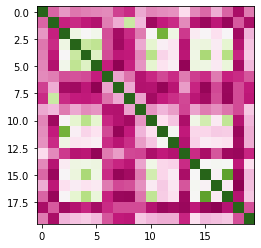

In [58]:
plt.imshow(embeddings @ embeddings.T, cmap='PiYG')

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

embedding_transform = pca.fit_transform(embeddings)

print(pca.explained_variance_ratio_)

embedding_transform[:, :2]


[0.22174413 0.08972115 0.08639597 0.07537112 0.06948007 0.05834669
 0.05270366 0.04663011 0.04618939 0.04202655]


array([[ 0.13260228,  0.20655751],
       [ 0.34127284, -0.07395443],
       [-0.15154366,  0.20176294],
       [-0.19320456, -0.04182163],
       [-0.20740724, -0.12906024],
       [-0.20626516, -0.03519631],
       [ 0.20794172,  0.02112056],
       [ 0.29936496, -0.07973785],
       [ 0.31929875, -0.09836983],
       [ 0.11318835,  0.02223985],
       [-0.21448114, -0.10227826],
       [-0.10484066,  0.2528624 ],
       [-0.09439079,  0.14551671],
       [ 0.25652904,  0.17787826],
       [-0.1417197 , -0.03510342],
       [-0.24180485, -0.10473952],
       [-0.07622373,  0.05682237],
       [-0.24635006, -0.13403774],
       [ 0.21475195, -0.24069819],
       [-0.00671832, -0.00976318]])

SyntaxError: can't use starred expression here (893408199.py, line 1)

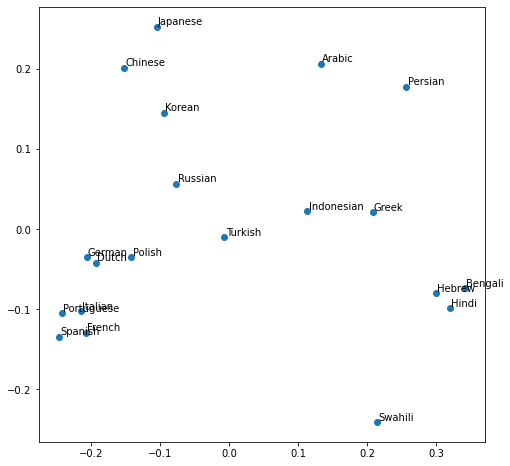

In [70]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(*embedding_transform.T[[0,1]])

for idx, name in enumerate(embedding_words.language):
    ax.annotate(name, embedding_transform[idx][:2] + (0.002, 0.002))